# PART 1(STATIONARY BANDIT SETTING)

## 1. Epsilon Greedy Algorithm

In [1]:
import numpy as np

class Bandit:
    def __init__(self, k=10):
        self.k = k
        self.means = np.random.normal(0, 1, k)  # True mean for each arm
        self.optimal = np.argmax(self.means)    # Best arm index

    def pull(self, action):
        return np.random.normal(self.means[action], 1)  # Reward from arm


In [2]:
class EpsilonGreedyAgent:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.q = np.zeros(k)       # Estimated value of each action
        self.n = np.zeros(k)       # Number of times each action was chosen

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            max_q = np.max(self.q)
            return np.random.choice(np.flatnonzero(self.q == max_q))  # Exploit, break ties randomly

    def update(self, action, reward):
        self.n[action] += 1
        self.q[action] += (reward - self.q[action]) / self.n[action]  # Incremental average


In [3]:
def run_epsilon_greedy(epsilon, runs=1000, steps=2000, k=10):
    avg_rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for seed in range(runs):
        np.random.seed(seed)
        bandit = Bandit(k)
        agent = EpsilonGreedyAgent(k, epsilon)

        for t in range(steps):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)

            avg_rewards[t] += reward
            if action == bandit.optimal:
                optimal_action_counts[t] += 1

    avg_rewards /= runs
    optimal_action_counts = (optimal_action_counts / runs) * 100  # convert to percentage
    return avg_rewards, optimal_action_counts


In [4]:
import matplotlib.pyplot as plt

def plot_results(avg_rewards, optimal_action_counts, epsilon):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.title(f"Average Reward (ε = {epsilon})")
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")

    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_counts)
    plt.title(f"% Optimal Action (ε = {epsilon})")
    plt.xlabel("Steps")
    plt.ylabel("% Optimal Action Chosen")

    plt.tight_layout()
    plt.show()


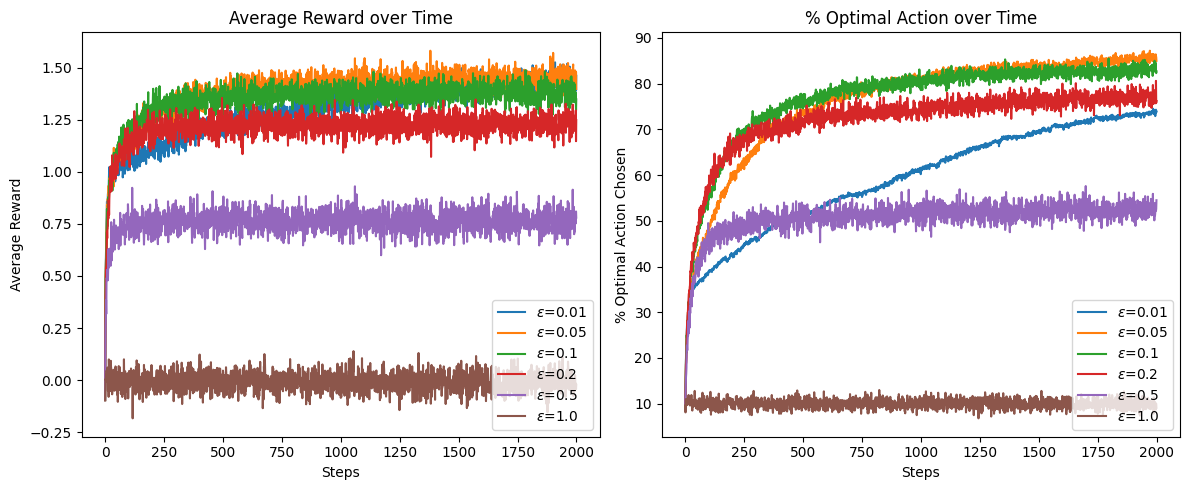

In [5]:
epsilon_values = (0.01, 0.05, 0.1, 0.2, 0.5, 1.0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Average Reward over Time")
plt.xlabel("Steps")
plt.ylabel("Average Reward")

plt.subplot(1, 2, 2)
plt.title("% Optimal Action over Time")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action Chosen")

for epsilon in epsilon_values:
    avg_rewards, optimal_action_counts = run_epsilon_greedy(epsilon)
    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards, label=f"$\epsilon$={epsilon}")
    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_counts, label=f"$\epsilon$={epsilon}")

plt.subplot(1, 2, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.legend()

plt.tight_layout()
plt.show()

## 2. Optimistic Greedy Approach

In [6]:
import numpy as np

# Constants
k = 10  # number of arms
n_steps = 2000
n_simulations = 1000


In [7]:
def optimistic_greedy(simulations=1000, steps=2000):
    average_rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for sim in range(simulations):
        # Generate true means for each arm
        true_means = np.random.normal(0, 1, k)
        optimal_action = np.argmax(true_means)

        # Get the optimistic initial Q value using 99.5th percentile of best arm
        mu_star = np.max(true_means)
        optimistic_Q = mu_star + 2.58  # 99.5 percentile for N(mu, 1)

        # Initialize estimates and counts
        Q = np.full(k, optimistic_Q)
        N = np.zeros(k)

        rewards = []
        optimal_actions = []

        for t in range(steps):
            # Choose greedy action (break ties randomly)
            max_Q = np.max(Q)
            action_candidates = np.where(Q == max_Q)[0]
            action = np.random.choice(action_candidates)

            # Reward from the environment
            reward = np.random.normal(true_means[action], 1)
            rewards.append(reward)
            optimal_actions.append(int(action == optimal_action))

            # Update estimates using sample average method
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]

        average_rewards += rewards
        optimal_action_counts += optimal_actions

    # Average over all simulations
    average_rewards /= simulations
    optimal_action_counts = (optimal_action_counts / simulations) * 100

    return average_rewards, optimal_action_counts


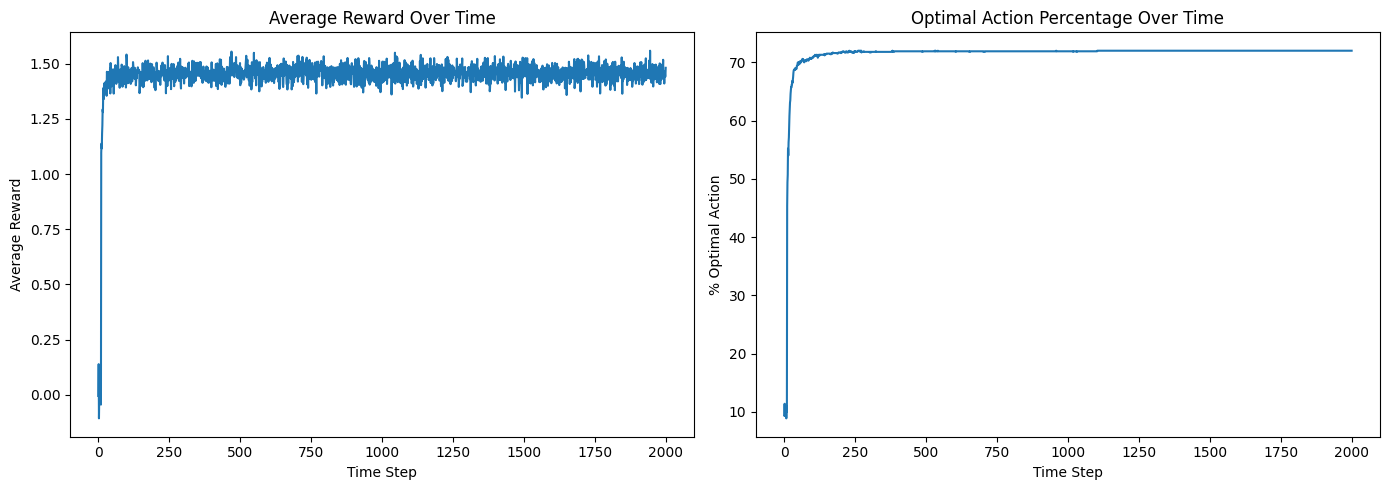

In [8]:
import matplotlib.pyplot as plt

avg_rewards, opt_action_perc = optimistic_greedy()

plt.figure(figsize=(14, 5))

# Plot average reward
plt.subplot(1, 2, 1)
plt.plot(avg_rewards)
plt.title("Average Reward Over Time")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")

# Plot % optimal action
plt.subplot(1, 2, 2)
plt.plot(opt_action_perc)
plt.title("Optimal Action Percentage Over Time")
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")

plt.tight_layout()
plt.show()

# Tuning the optimism levels

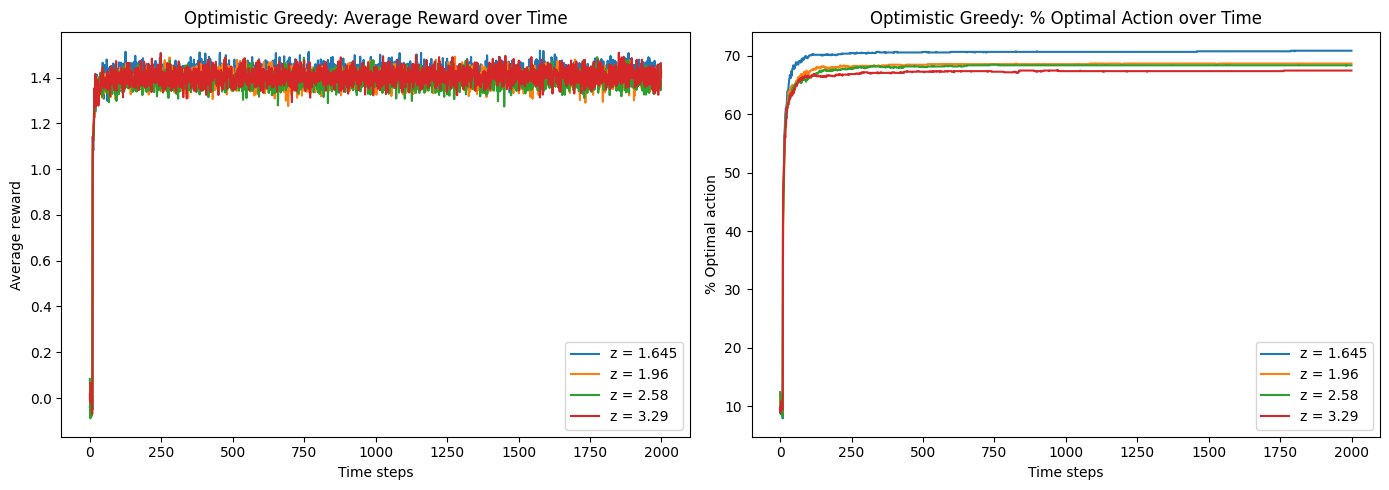

In [9]:
optimism_levels = [1.645, 1.96, 2.58, 3.29]  # Correspond to different percentiles

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Optimistic Greedy: Average Reward over Time")
plt.xlabel("Time steps")
plt.ylabel("Average reward")

plt.subplot(1, 2, 2)
plt.title("Optimistic Greedy: % Optimal Action over Time")
plt.xlabel("Time steps")
plt.ylabel("% Optimal action")


for z in optimism_levels:

    avg_rewards, opt_action_perc = optimistic_greedy() # Call the function to get the data

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards, label=f'z = {z}')

    plt.subplot(1, 2, 2)
    plt.plot(opt_action_perc, label=f'z = {z}')

plt.subplot(1, 2, 1)
plt.legend()

plt.subplot(1, 2, 2)
plt.legend()

plt.tight_layout()
plt.show()

## 3. Gradient Bandit Algorithm

In [10]:
import numpy as np

def run_gradient_bandit(alpha, T=2000, runs=1000, k=10, seed=None):

    if seed is not None:
        np.random.seed(seed)

    rewards_all = np.zeros((runs, T))
    optimal_action_counts = np.zeros((runs, T))

    for run in range(runs):
        true_means = np.random.normal(0, 1, k)
        optimal_action = np.argmax(true_means)

        H = np.zeros(k)
        avg_reward = 0

        for t in range(1, T + 1):
            max_H = np.max(H)
            exp_H = np.exp(H - max_H)
            probs = exp_H / np.sum(exp_H)

            action = np.random.choice(k, p=probs)
            reward = np.random.normal(true_means[action], 1)

            avg_reward += (reward - avg_reward) / t

            for a in range(k):
                indicator = 1 if a == action else 0
                H[a] += alpha * (reward - avg_reward) * (indicator - probs[a])

            rewards_all[run, t-1] = reward
            if action == optimal_action:
                optimal_action_counts[run, t-1] = 1

    avg_rewards = rewards_all.mean(axis=0)
    pct_optimal = optimal_action_counts.mean(axis=0) * 100

    return avg_rewards, pct_optimal


In [11]:
import matplotlib.pyplot as plt

def plot_results(avg_rewards, pct_optimal, alpha):

    plt.figure(figsize=(14,5))

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel('Time steps')
    plt.ylabel('Average reward')
    plt.title(f'Gradient Bandit: Average Reward (alpha={alpha})')

    plt.subplot(1, 2, 2)
    plt.plot(pct_optimal)
    plt.xlabel('Time steps')
    plt.ylabel('% Optimal action')
    plt.title(f'Gradient Bandit: % Optimal Action (alpha={alpha})')

    plt.tight_layout()
    plt.show()


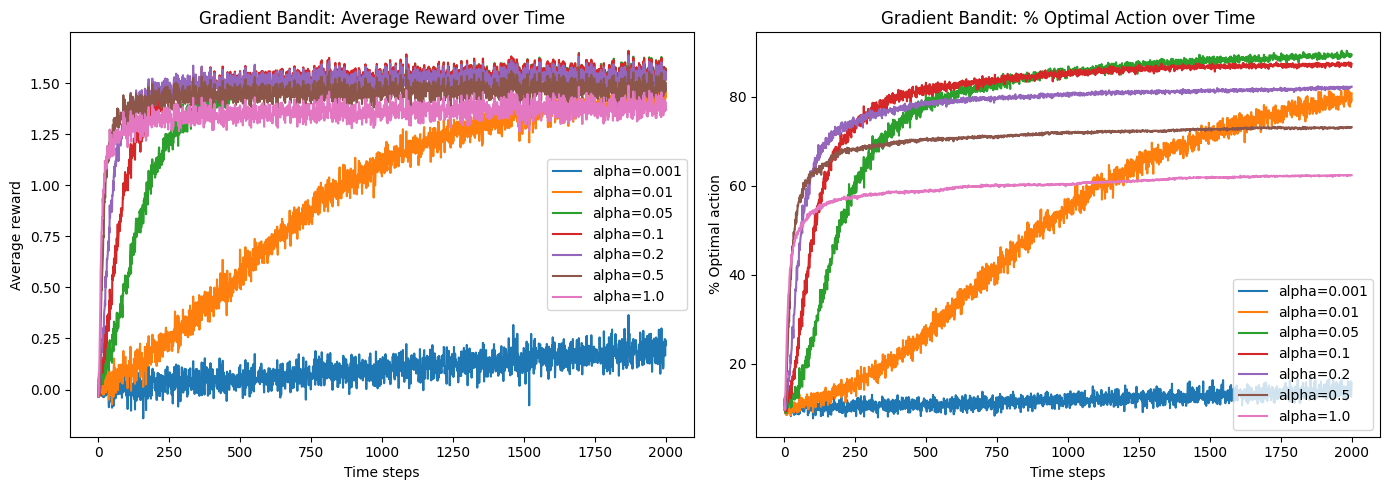

In [12]:
alpha_values = (0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title("Gradient Bandit: Average Reward over Time")
plt.xlabel("Time steps")
plt.ylabel("Average reward")

plt.subplot(1, 2, 2)
plt.title("Gradient Bandit: % Optimal Action over Time")
plt.xlabel("Time steps")
plt.ylabel("% Optimal action")

for alpha in alpha_values:
    avg_rewards, pct_optimal = run_gradient_bandit(alpha=alpha, T=2000, runs=1000, k=10, seed=42)
    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards, label=f"alpha={alpha}")
    plt.subplot(1, 2, 2)
    plt.plot(pct_optimal, label=f"alpha={alpha}")

plt.subplot(1, 2, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.legend()

plt.tight_layout()
plt.show()

# 4. Greedy with non-optimistic initial values(Q=0)

In [13]:
def run_greedy_bandit(T=2000, runs=1000, k=10, seed=None):

    if seed is not None:
        np.random.seed(seed)

    rewards_all = np.zeros((runs, T))
    optimal_action_counts = np.zeros((runs, T))

    for run in range(runs):
        # True action values sampled from N(0,1)
        true_means = np.random.normal(0, 1, k)
        optimal_action = np.argmax(true_means)

        Q = np.zeros(k)  # initial action-value estimates (non-optimistic)
        N = np.zeros(k)  # count of selections for each action

        for t in range(T):
            # Select greedy action (break ties randomly)
            max_Q = np.max(Q)
            greedy_actions = np.where(Q == max_Q)[0]
            action = np.random.choice(greedy_actions)

            # Sample reward from N(μ_i, 1)
            reward = np.random.normal(true_means[action], 1)

            # Update Q estimate
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]

            # Record reward and optimal action
            rewards_all[run, t] = reward
            if action == optimal_action:
                optimal_action_counts[run, t] = 1

    avg_rewards = rewards_all.mean(axis=0)
    pct_optimal = optimal_action_counts.mean(axis=0) * 100

    return avg_rewards, pct_optimal


In [14]:
import matplotlib.pyplot as plt

def plot_results(avg_rewards, pct_optimal, alpha):

    plt.figure(figsize=(14,5))

    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel('Time steps')
    plt.ylabel('Average reward')
    plt.title(f'Greedy: Average Reward (initial Q=0)')

    plt.subplot(1, 2, 2)
    plt.plot(pct_optimal)
    plt.xlabel('Time steps')
    plt.ylabel('% Optimal action')
    plt.title(f'Greedy: % Optimal Action (initial Q=0)')

    plt.tight_layout()
    plt.show()


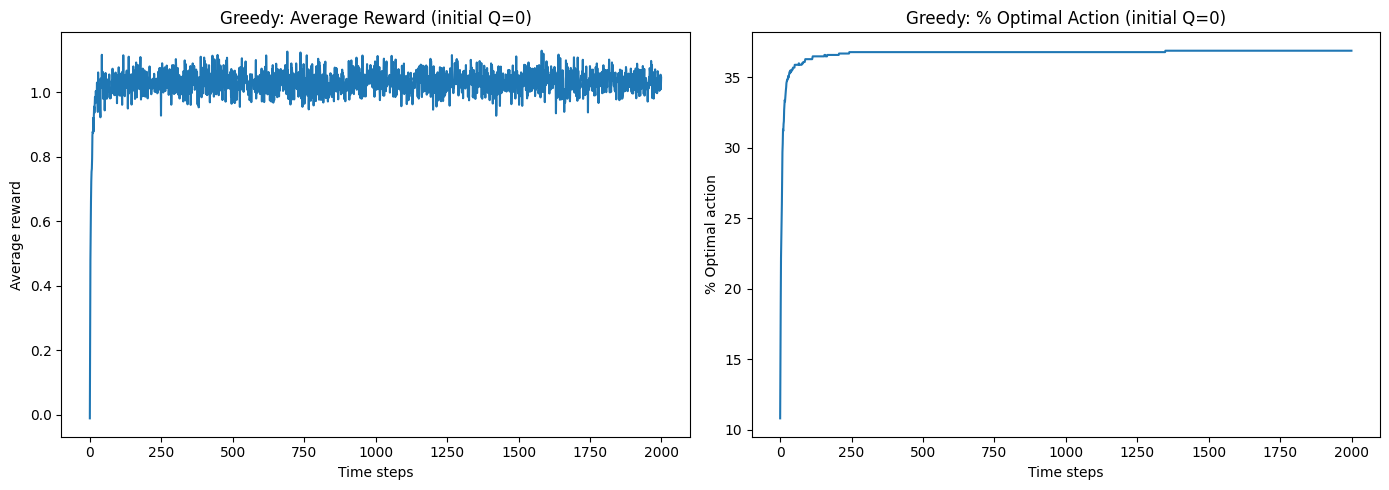

In [15]:
# Run the greedy bandit algorithm
avg_rewards, pct_optimal = run_greedy_bandit(T=2000, runs=1000, k=10, seed=42)

# Plot the results
plot_results(avg_rewards, pct_optimal, alpha=0)

# PART 2(NON-STATIONARY BANDIT SETTING)

# Gradual Changes - Applying Drift and Mean Reverting Changes



# 1. Epsilon Greedy Algorithm

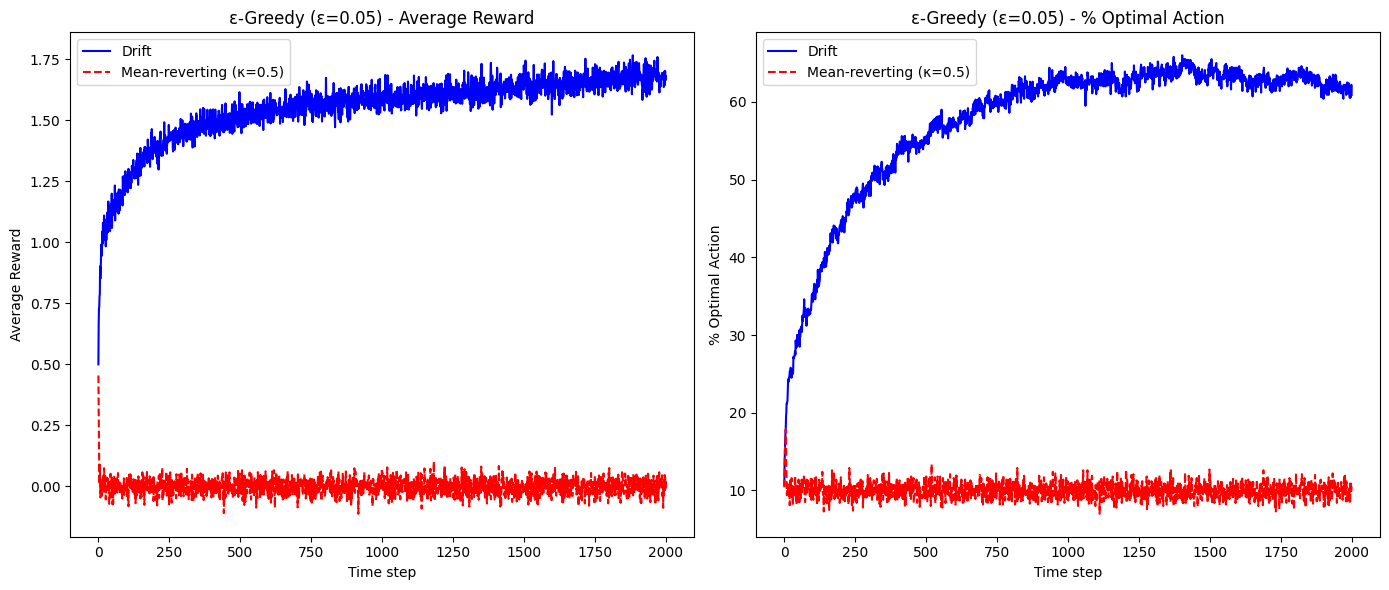

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 10
steps = 2000
sigma = 0.012
epsilon = 0.05
num_simulations = 1000

np.random.seed(42)
mu_init = np.random.normal(0, 1, size=k)

def generate_nonstationary_means(mu_init, steps, sigma, kappa=None):
    means = np.zeros((k, steps))
    means[:, 0] = mu_init
    for t in range(1, steps):
        noise = np.random.normal(0, sigma, size=k)
        if kappa is None:
            means[:, t] = means[:, t-1] + noise  # Drift
        else:
            means[:, t] = kappa * means[:, t-1] + noise  # Mean-reverting
    return means

def epsilon_greedy_nonstationary(mu_init, epsilon, steps, sigma, kappa, num_simulations):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        means = generate_nonstationary_means(mu_init, steps, sigma, kappa)
        Q = np.zeros(k)  # action-value estimates
        N = np.zeros(k)  # counts of actions taken

        for t in range(steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(k)  # explore
            else:
                max_Q = np.max(Q)
                candidates = np.flatnonzero(Q == max_Q)
                action = np.random.choice(candidates)  # break ties randomly

            reward = np.random.normal(means[action, t], 1)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]  # sample-average update

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

# Run for drift
avg_rewards_drift, pct_optimal_drift = epsilon_greedy_nonstationary(
    mu_init, epsilon, steps, sigma, kappa=None, num_simulations=num_simulations)

# Run for mean-reverting
avg_rewards_meanrev, pct_optimal_meanrev = epsilon_greedy_nonstationary(
    mu_init, epsilon, steps, sigma, kappa=0.5, num_simulations=num_simulations)

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_drift, label="Drift", color='blue')
plt.plot(avg_rewards_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("ε-Greedy (ε=0.05) - Average Reward")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_optimal_drift, label="Drift", color='blue')
plt.plot(pct_optimal_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("ε-Greedy (ε=0.05) - % Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()


# 2. Optimistic Greedy Approach

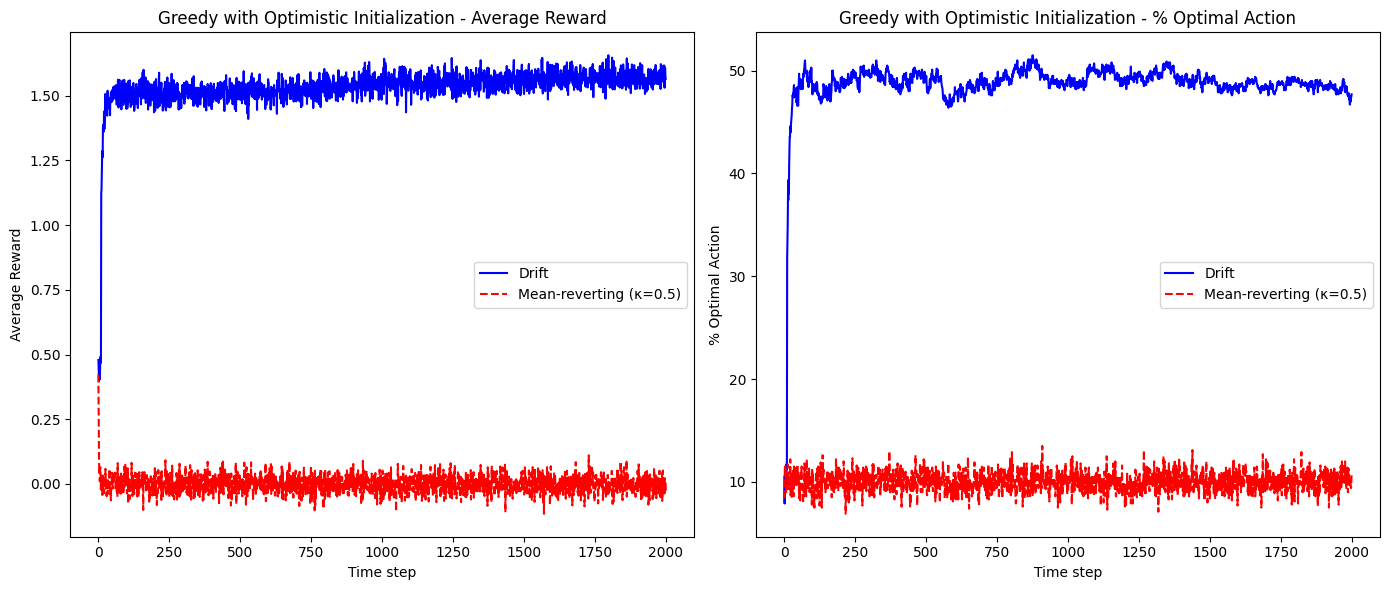

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
k = 10
steps = 2000
sigma = 0.012
num_simulations = 1000

np.random.seed(42)
mu_init = np.random.normal(0, 1, size=k)

# Find the 99.5th percentile of the highest mean arm’s normal distribution (with variance 1)
max_mu = np.max(mu_init)
optimistic_init = norm.ppf(0.995, loc=max_mu, scale=1)  # 99.5 percentile

def generate_nonstationary_means(mu_init, steps, sigma, kappa=None):
    means = np.zeros((k, steps))
    means[:, 0] = mu_init
    for t in range(1, steps):
        noise = np.random.normal(0, sigma, size=k)
        if kappa is None:
            means[:, t] = means[:, t-1] + noise  # Drift
        else:
            means[:, t] = kappa * means[:, t-1] + noise  # Mean-reverting
    return means

def greedy_optimistic_nonstationary(mu_init, optimistic_init, steps, sigma, kappa, num_simulations):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        means = generate_nonstationary_means(mu_init, steps, sigma, kappa)
        Q = np.full(k, optimistic_init)  # optimistic initial action-value estimates
        N = np.zeros(k)  # counts of actions taken

        for t in range(steps):
            max_Q = np.max(Q)
            candidates = np.flatnonzero(Q == max_Q)
            action = np.random.choice(candidates)  # greedy choice with random tie-breaking

            reward = np.random.normal(means[action, t], 1)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]  # sample-average update

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

# Run for drift
avg_rewards_drift, pct_optimal_drift = greedy_optimistic_nonstationary(
    mu_init, optimistic_init, steps, sigma, kappa=None, num_simulations=num_simulations)

# Run for mean-reverting
avg_rewards_meanrev, pct_optimal_meanrev = greedy_optimistic_nonstationary(
    mu_init, optimistic_init, steps, sigma, kappa=0.5, num_simulations=num_simulations)

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_drift, label="Drift", color='blue')
plt.plot(avg_rewards_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("Greedy with Optimistic Initialization - Average Reward")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_optimal_drift, label="Drift", color='blue')
plt.plot(pct_optimal_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("Greedy with Optimistic Initialization - % Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()


# 3. Gradient-Bandit Algorithm

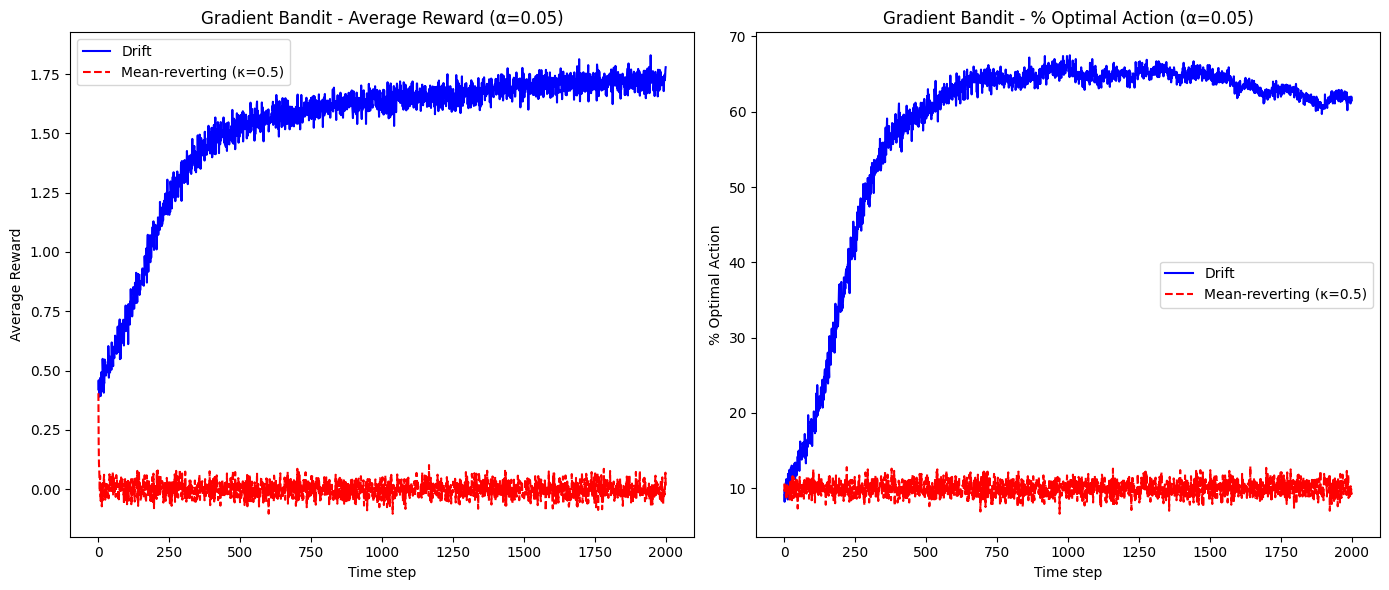

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 10
steps = 2000
sigma = 0.012
alpha = 0.05  # Tuned learning rate
num_simulations = 1000

# Initial means for arms
np.random.seed(42)
mu_init = np.random.normal(0, 1, size=k)

def generate_nonstationary_means(mu_init, steps, sigma, kappa=None):
    means = np.zeros((k, steps))
    means[:, 0] = mu_init
    for t in range(1, steps):
        noise = np.random.normal(0, sigma, size=k)
        if kappa is None:
            means[:, t] = means[:, t-1] + noise  # Drift
        else:
            means[:, t] = kappa * means[:, t-1] + noise  # Mean-reverting
    return means

def gradient_bandit_nonstationary(mu_init, alpha, steps, sigma, kappa, num_simulations):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        means = generate_nonstationary_means(mu_init, steps, sigma, kappa)
        H = np.zeros(k)  # action preferences
        avg_reward = 0

        for t in range(steps):
            # Softmax policy
            max_H = np.max(H)
            exp_H = np.exp(H - max_H)  # numerical stability
            pi = exp_H / np.sum(exp_H)

            action = np.random.choice(k, p=pi)
            reward = np.random.normal(means[action, t], 1)

            # Update average reward baseline incrementally
            avg_reward += (reward - avg_reward) / (t + 1)

            # Update preferences
            for a in range(k):
                if a == action:
                    H[a] += alpha * (reward - avg_reward) * (1 - pi[a])
                else:
                    H[a] -= alpha * (reward - avg_reward) * pi[a]

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

# Run for drift scenario
avg_rewards_drift, pct_optimal_drift = gradient_bandit_nonstationary(
    mu_init, alpha, steps, sigma, kappa=None, num_simulations=num_simulations)

# Run for mean-reverting scenario
avg_rewards_meanrev, pct_optimal_meanrev = gradient_bandit_nonstationary(
    mu_init, alpha, steps, sigma, kappa=0.5, num_simulations=num_simulations)

# Plotting results side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_drift, label="Drift", color='blue', linestyle='-')
plt.plot(avg_rewards_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("Gradient Bandit - Average Reward (α=0.05)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_optimal_drift, label="Drift", color='blue', linestyle='-')
plt.plot(pct_optimal_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("Gradient Bandit - % Optimal Action (α=0.05)")
plt.legend()

plt.tight_layout()
plt.show()


# 4. Non-Optimistic Greedy(Q=0)

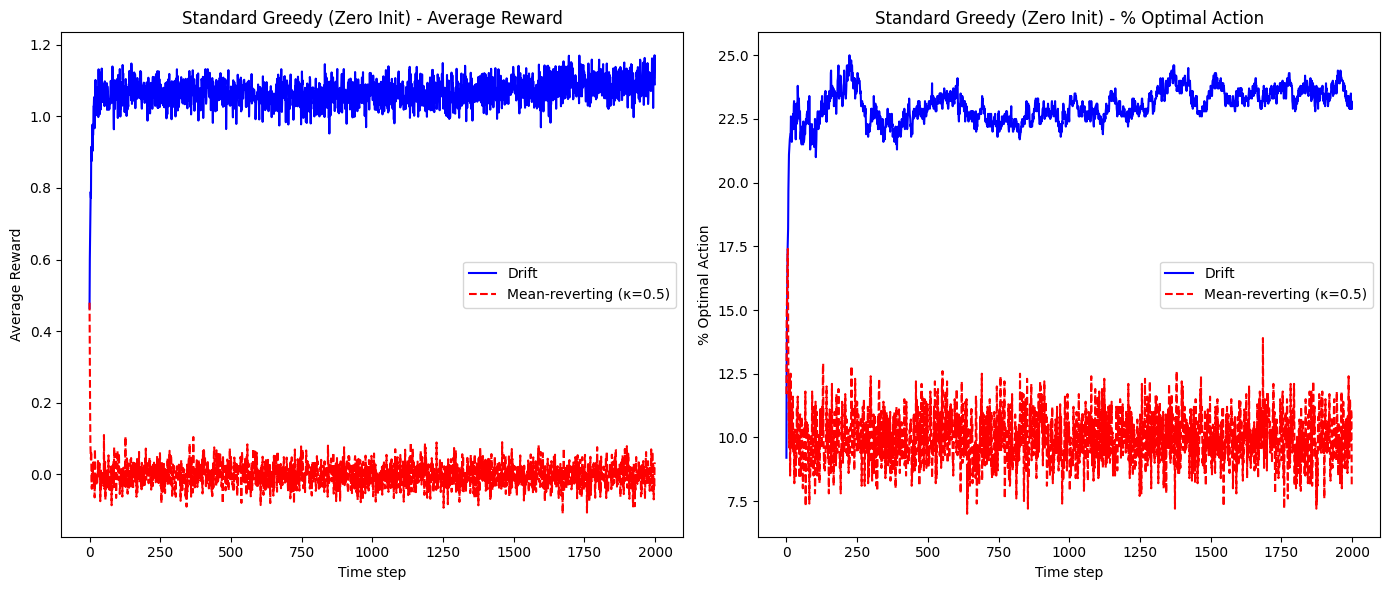

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 10
steps = 2000
sigma = 0.012
num_simulations = 1000

np.random.seed(42)
mu_init = np.random.normal(0, 1, size=k)

def generate_nonstationary_means(mu_init, steps, sigma, kappa=None):
    means = np.zeros((k, steps))
    means[:, 0] = mu_init
    for t in range(1, steps):
        noise = np.random.normal(0, sigma, size=k)
        if kappa is None:
            means[:, t] = means[:, t-1] + noise  # Drift
        else:
            means[:, t] = kappa * means[:, t-1] + noise  # Mean-reverting
    return means

def greedy_zero_init_nonstationary(mu_init, steps, sigma, kappa, num_simulations):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        means = generate_nonstationary_means(mu_init, steps, sigma, kappa)
        Q = np.zeros(k)  # zero initialization
        N = np.zeros(k)  # counts of actions taken

        for t in range(steps):
            max_Q = np.max(Q)
            candidates = np.flatnonzero(Q == max_Q)
            action = np.random.choice(candidates)  # greedy with random tie-break

            reward = np.random.normal(means[action, t], 1)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]  # sample average update

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

# Run for drift
avg_rewards_drift, pct_optimal_drift = greedy_zero_init_nonstationary(
    mu_init, steps, sigma, kappa=None, num_simulations=num_simulations)

# Run for mean-reverting
avg_rewards_meanrev, pct_optimal_meanrev = greedy_zero_init_nonstationary(
    mu_init, steps, sigma, kappa=0.5, num_simulations=num_simulations)

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_drift, label="Drift", color='blue')
plt.plot(avg_rewards_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("Standard Greedy (Zero Init) - Average Reward")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_optimal_drift, label="Drift", color='blue')
plt.plot(pct_optimal_meanrev, label="Mean-reverting (κ=0.5)", color='red', linestyle='--')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("Standard Greedy (Zero Init) - % Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()


# Abrupt Changes

# 1. Epsilon Greedy Algorithm

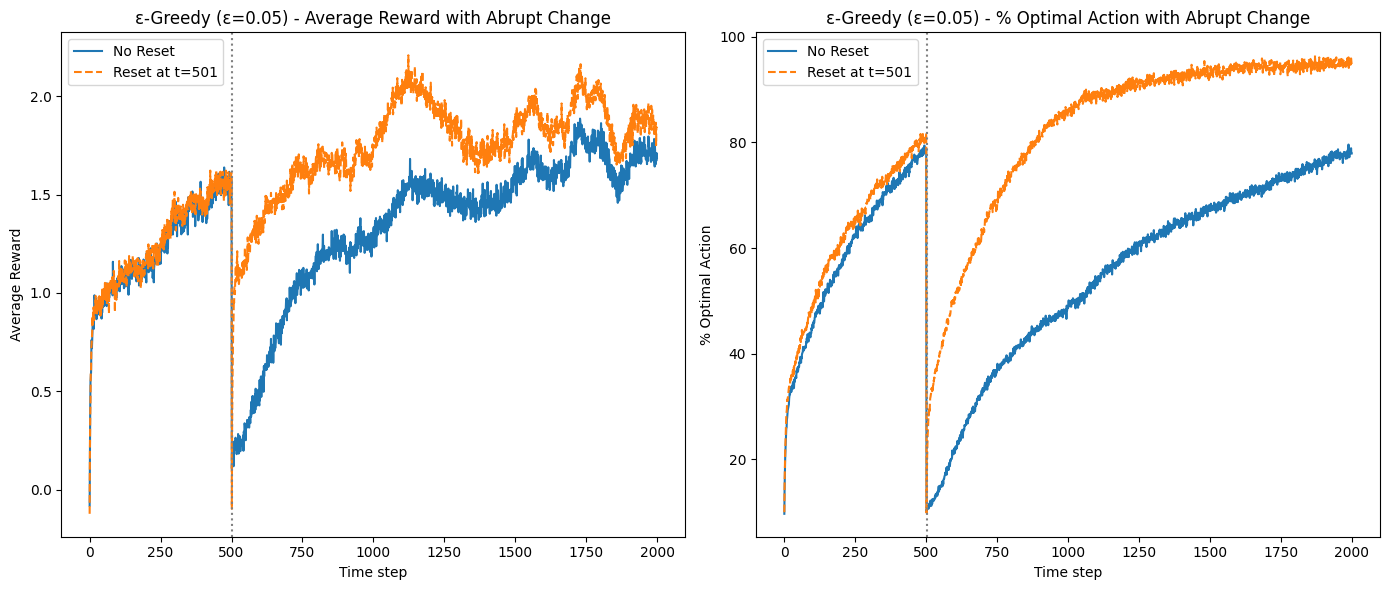

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 10
steps = 2000
change_point = 501
sigma = 0.012
epsilon = 0.05
num_simulations = 1000

# Fix global seeds for noise and permutation
np.random.seed(1234)
mu_init = np.random.normal(0, 1, size=k)

# Generate drift noise for each arm and timestep (shared across all simulations)
noise = np.random.normal(0, sigma, size=(k, steps-1))

# Generate means over time with drift (before permutation)
means = np.zeros((k, steps))
means[:, 0] = mu_init
for t in range(1, steps):
    means[:, t] = means[:, t-1] + noise[:, t-1]

# Generate fixed permutation at change_point
perm = np.random.permutation(k)

def epsilon_greedy_abrupt(means, epsilon, change_point, perm, reset=False):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        Q = np.zeros(k)
        N = np.zeros(k)

        for t in range(steps):
            # At change point, permute means and optionally reset Q and N
            if t == change_point:
                means[:, t:] = means[perm, t:]  # permute future means
                if reset:
                    Q = np.zeros(k)
                    N = np.zeros(k)

            # ε-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.choice(k)
            else:
                max_Q = np.max(Q)
                candidates = np.flatnonzero(Q == max_Q)
                action = np.random.choice(candidates)

            reward = np.random.normal(means[action, t], 1)

            # Update estimates with sample-average method
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

# Run without reset
avg_rewards_no_reset, pct_opt_no_reset = epsilon_greedy_abrupt(
    means.copy(), epsilon, change_point, perm, reset=False)

# Run with reset
avg_rewards_reset, pct_opt_reset = epsilon_greedy_abrupt(
    means.copy(), epsilon, change_point, perm, reset=True)

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_no_reset, label="No Reset")
plt.plot(avg_rewards_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("ε-Greedy (ε=0.05) - Average Reward with Abrupt Change")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_opt_no_reset, label="No Reset")
plt.plot(pct_opt_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("ε-Greedy (ε=0.05) - % Optimal Action with Abrupt Change")
plt.legend()

plt.tight_layout()
plt.show()


# 2. Optimistic Greedy Approach

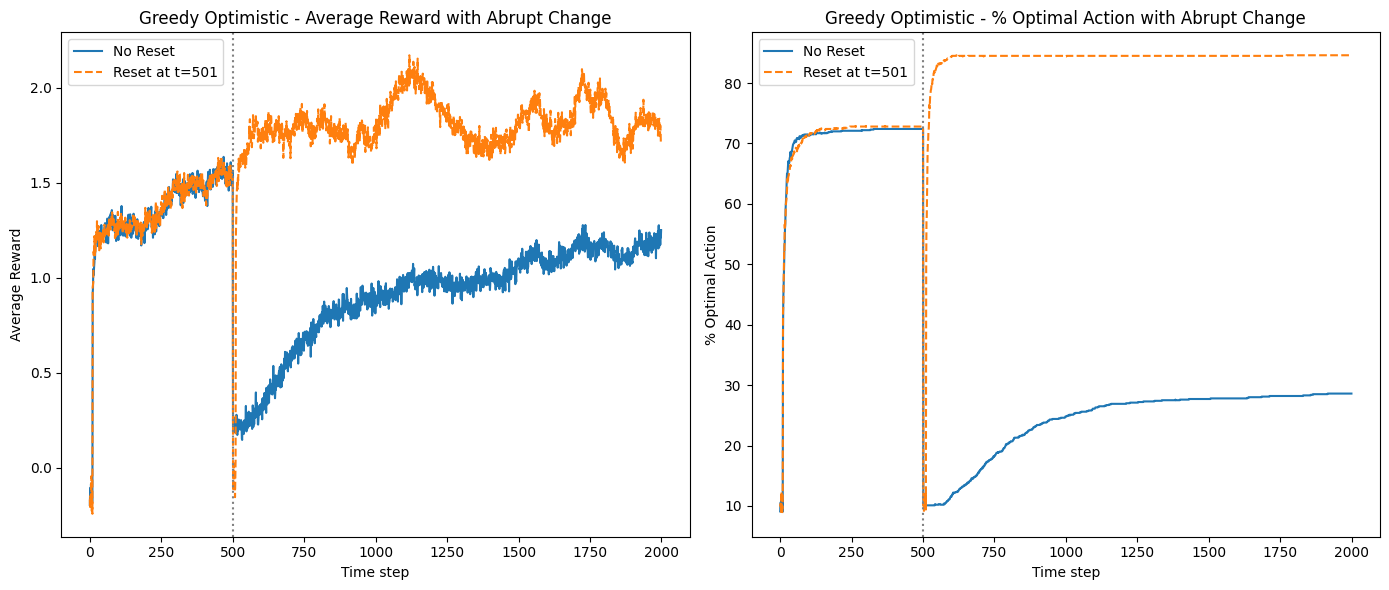

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

k = 10
steps = 2000
change_point = 501
sigma = 0.012
num_simulations = 1000

np.random.seed(1234)
mu_init = np.random.normal(0, 1, size=k)

# 99.5th percentile optimistic initial value based on max initial mean
max_mu = np.max(mu_init)
optimistic_init = norm.ppf(0.995, loc=max_mu, scale=1)

# Generate drift noise once
noise = np.random.normal(0, sigma, size=(k, steps-1))
means = np.zeros((k, steps))
means[:, 0] = mu_init
for t in range(1, steps):
    means[:, t] = means[:, t-1] + noise[:, t-1]

# Fixed permutation
perm = np.random.permutation(k)

def greedy_optimistic_abrupt(means, optimistic_init, change_point, perm, reset=False):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        Q = np.full(k, optimistic_init)
        N = np.zeros(k)

        for t in range(steps):
            if t == change_point:
                means[:, t:] = means[perm, t:]
                if reset:
                    Q = np.full(k, optimistic_init)
                    N = np.zeros(k)

            max_Q = np.max(Q)
            candidates = np.flatnonzero(Q == max_Q)
            action = np.random.choice(candidates)

            reward = np.random.normal(means[action, t], 1)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

avg_rewards_no_reset, pct_opt_no_reset = greedy_optimistic_abrupt(
    means.copy(), optimistic_init, change_point, perm, reset=False)

avg_rewards_reset, pct_opt_reset = greedy_optimistic_abrupt(
    means.copy(), optimistic_init, change_point, perm, reset=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_no_reset, label="No Reset")
plt.plot(avg_rewards_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("Greedy Optimistic - Average Reward with Abrupt Change")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_opt_no_reset, label="No Reset")
plt.plot(pct_opt_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("Greedy Optimistic - % Optimal Action with Abrupt Change")
plt.legend()

plt.tight_layout()
plt.show()


# 3. Greedy with non-optimistic initial values(Q=0)

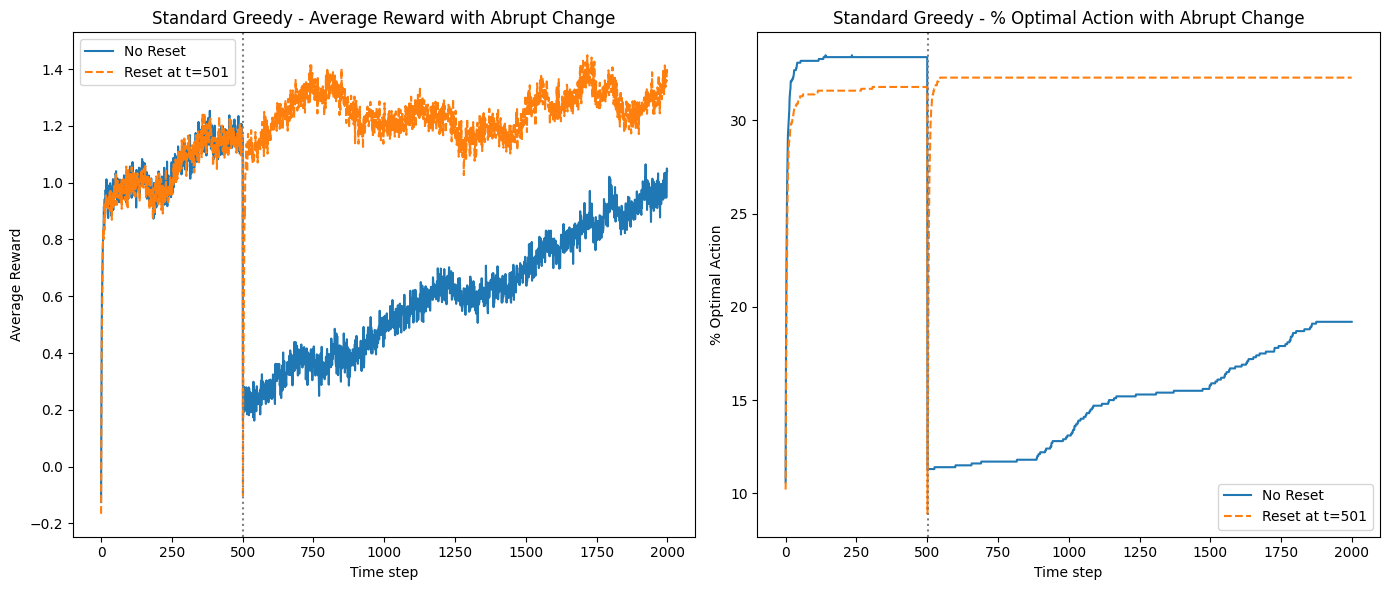

In [22]:
import numpy as np
import matplotlib.pyplot as plt

k = 10
steps = 2000
change_point = 501
sigma = 0.012
num_simulations = 1000

np.random.seed(1234)
mu_init = np.random.normal(0, 1, size=k)

# Generate noise and means with drift (shared for all sims)
noise = np.random.normal(0, sigma, size=(k, steps - 1))
means = np.zeros((k, steps))
means[:, 0] = mu_init
for t in range(1, steps):
    means[:, t] = means[:, t - 1] + noise[:, t - 1]

perm = np.random.permutation(k)

def standard_greedy_abrupt(means, change_point, perm, reset=False):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        Q = np.zeros(k)
        N = np.zeros(k)

        for t in range(steps):
            if t == change_point:
                means[:, t:] = means[perm, t:]
                if reset:
                    Q = np.zeros(k)
                    N = np.zeros(k)

            max_Q = np.max(Q)
            candidates = np.flatnonzero(Q == max_Q)
            action = np.random.choice(candidates)

            reward = np.random.normal(means[action, t], 1)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

avg_rewards_no_reset, pct_opt_no_reset = standard_greedy_abrupt(
    means.copy(), change_point, perm, reset=False)

avg_rewards_reset, pct_opt_reset = standard_greedy_abrupt(
    means.copy(), change_point, perm, reset=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_no_reset, label="No Reset")
plt.plot(avg_rewards_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("Standard Greedy - Average Reward with Abrupt Change")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_opt_no_reset, label="No Reset")
plt.plot(pct_opt_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("Standard Greedy - % Optimal Action with Abrupt Change")
plt.legend()

plt.tight_layout()
plt.show()


# 4. Gradient Bandit Algorithm

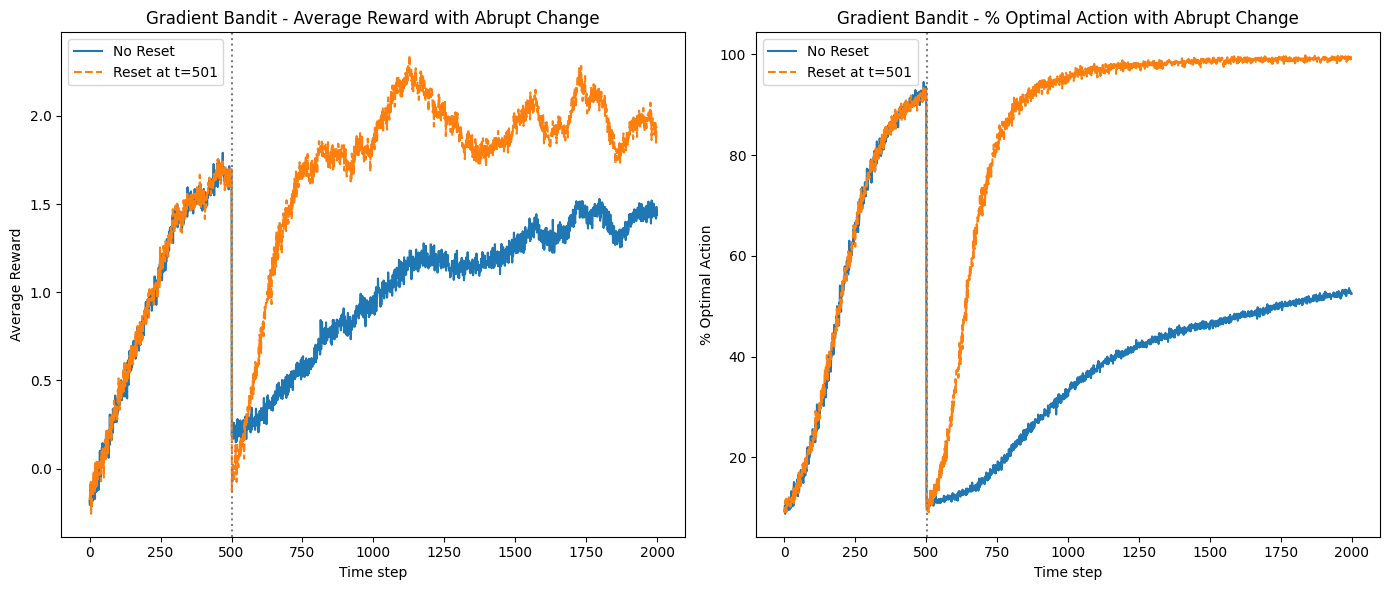

In [23]:
import numpy as np
import matplotlib.pyplot as plt

k = 10
steps = 2000
change_point = 501
sigma = 0.012
alpha = 0.05  # tuned learning rate from part 1
num_simulations = 1000

np.random.seed(1234)
mu_init = np.random.normal(0, 1, size=k)

# Generate noise and means with drift
noise = np.random.normal(0, sigma, size=(k, steps - 1))
means = np.zeros((k, steps))
means[:, 0] = mu_init
for t in range(1, steps):
    means[:, t] = means[:, t - 1] + noise[:, t - 1]

perm = np.random.permutation(k)

def gradient_bandit_abrupt(means, alpha, change_point, perm, reset=False):
    rewards_all = np.zeros((num_simulations, steps))
    optimal_actions_all = np.zeros((num_simulations, steps))

    for sim in range(num_simulations):
        H = np.zeros(k)  # preferences
        avg_reward = 0

        for t in range(steps):
            if t == change_point:
                means[:, t:] = means[perm, t:]
                if reset:
                    H = np.zeros(k)
                    avg_reward = 0

            exp_H = np.exp(H - np.max(H))  # for numerical stability
            pi = exp_H / np.sum(exp_H)  # action probabilities

            action = np.random.choice(k, p=pi)
            reward = np.random.normal(means[action, t], 1)

            avg_reward += (reward - avg_reward) / (t + 1)  # running average

            baseline = avg_reward
            one_hot = np.zeros(k)
            one_hot[action] = 1

            H += alpha * (reward - baseline) * (one_hot - pi)

            rewards_all[sim, t] = reward
            optimal_action = np.argmax(means[:, t])
            optimal_actions_all[sim, t] = 1 if action == optimal_action else 0

    avg_rewards = np.mean(rewards_all, axis=0)
    pct_optimal_actions = np.mean(optimal_actions_all, axis=0) * 100
    return avg_rewards, pct_optimal_actions

avg_rewards_no_reset, pct_opt_no_reset = gradient_bandit_abrupt(
    means.copy(), alpha, change_point, perm, reset=False)

avg_rewards_reset, pct_opt_reset = gradient_bandit_abrupt(
    means.copy(), alpha, change_point, perm, reset=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_no_reset, label="No Reset")
plt.plot(avg_rewards_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("Average Reward")
plt.title("Gradient Bandit - Average Reward with Abrupt Change")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pct_opt_no_reset, label="No Reset")
plt.plot(pct_opt_reset, label="Reset at t=501", linestyle='--')
plt.axvline(change_point, color='gray', linestyle=':')
plt.xlabel("Time step")
plt.ylabel("% Optimal Action")
plt.title("Gradient Bandit - % Optimal Action with Abrupt Change")
plt.legend()

plt.tight_layout()
plt.show()
